#### run the cell below to install dependencies

In [66]:
!pip install -r requirements.txt

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [18]:
import os
import json
import requests
import pandas as pd
import alpaca_trade_api as tradeapi

from dotenv import load_dotenv

In [2]:
# Set the environment variables
load_dotenv()

True

## Trade API NDAQ

In [28]:
# Set the tickers
tickers = ["NDAQ"]
# Set timeframe to one day ('1Day') for the Alpaca API
timeframe = "1Day"
# Format current date as ISO format
today = pd.Timestamp("2022-08-09", tz="America/New_York").isoformat() 
start_date = pd.Timestamp("2000-08-09", tz="America/New_York").isoformat() 

with tradeapi.REST(os.getenv("ALPACA_API_KEY"), os.getenv("ALPACA_SECRET_KEY"), api_version="v2") as alpaca:
    # Get current price data for S&P500
    df_portfolio = alpaca.get_bars(
            tickers,
            timeframe,
            start = start_date,
            end = today
        ).df

In [29]:
NDAQ = df_portfolio[df_portfolio['symbol']=='NDAQ'].drop('symbol', axis=1)
NDAQ

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 05:00:00+00:00,58.89,59.1900,58.3000,58.72,892085,10204,58.609496
2015-12-02 05:00:00+00:00,58.93,59.0300,58.3400,58.51,846286,9032,58.653041
2015-12-03 05:00:00+00:00,58.71,58.7100,56.2900,56.98,1367247,15364,57.085429
2015-12-04 05:00:00+00:00,56.98,59.0899,56.9600,58.94,949362,9999,58.589142
2015-12-07 05:00:00+00:00,58.70,58.9400,57.3100,58.28,865383,9568,58.287730
...,...,...,...,...,...,...,...
2022-08-03 04:00:00+00:00,179.08,180.7200,178.3750,180.17,620148,17763,179.612217
2022-08-04 04:00:00+00:00,180.73,183.1200,180.6500,182.79,653769,16983,182.248683
2022-08-05 04:00:00+00:00,181.51,182.8100,180.4200,182.07,487097,16527,181.719909


#### Read in  Market Yield on U.S. Treasury Securities at 2-Year Constant Maturity, Quoted on an Investment Basis

In [19]:
# Define the base request URL
request_url = "https://api.stlouisfed.org/fred/series/observations?series_id=DGS2&api_key="

# Concatenate request_url and api_key. Store as new variable
request_url = request_url + os.getenv("FRED_API_KEY") + "&file_type=json"

# Execute get request
response_data = requests.get(request_url).json()
yield_value = pd.DataFrame(response_data['observations'])
yield_value

,realtime_start,realtime_end,date,value
0,2022-10-04,2022-10-04,1976-06-01,7.260
1,2022-10-04,2022-10-04,1976-06-02,7.230
2,2022-10-04,2022-10-04,1976-06-03,7.220
3,2022-10-04,2022-10-04,1976-06-04,7.120
4,2022-10-04,2022-10-04,1976-06-07,7.090
...,...,...,...,...
12084,2022-10-04,2022-10-04,2022-09-26,4.27
12085,2022-10-04,2022-10-04,2022-09-27,4.30
12086,2022-10-04,2022-10-04,2022-09-28,4.07
12087,2022-10-04,2022-10-04,2022-09-29,4.16


In [20]:
#Drop columns and set date as index and fix data types
yield_value['value'] = pd.to_numeric(yield_value['value'], errors='coerce')
yield_value = yield_value.drop(['realtime_start','realtime_end'],  axis=1)
yield_value.set_index(['date'])

,value
date,
1976-06-01,7.26
1976-06-02,7.23
1976-06-03,7.22
1976-06-04,7.12
1976-06-07,7.09
...,...
2022-09-26,4.27
2022-09-27,4.30
2022-09-28,4.07


<AxesSubplot:>

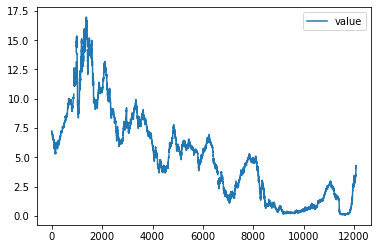

In [21]:
yield_value.plot()


## YAHOO Finance

In [56]:
import yfinance as yf
import seaborn as sns

from MCForecastTools import MCSimulation

In [31]:
tickers= ["SPY", "NDAQ", "^TYX"]
new_data= list()
for ticker in tickers:
    data = yf.download(ticker, start="2002-09-30", end="2022-09-30")
    new_data.append(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
data_df = pd.concat(new_data, axis=1, keys=["SPY", "NDAQ", "^TYX"])
data_df

SPY                                      \
                                 Open        High         Low       Close   
Date                                                                        
2002-09-30 00:00:00-04:00   82.000000   82.800003   80.900002   81.790001   
2002-10-01 00:00:00-04:00   82.430000   85.769997   81.470001   85.720001   
2002-10-02 00:00:00-04:00   84.690002   85.529999   82.599998   83.150002   
2002-10-03 00:00:00-04:00   83.139999   84.599998   81.949997   82.309998   
2002-10-04 00:00:00-04:00   82.800003   82.919998   79.580002   80.800003   
...                               ...         ...         ...         ...   
2022-09-23 00:00:00-04:00  370.579987  370.619995  363.290009  367.950012   
2022-09-26 00:00:00-04:00  366.410004  370.209991  363.029999  364.309998   
2022-09-27 00:00:00-04:00  368.019989  370.399994  360.869995  363.380005   
2022-09-28 00:00:00-04:00  364.380005  372.299988  362.600006  370.529999   
2022-09-29 00:00:00-04:00  366.809998  367.109985  359.700012  362.790009   

                                                       NDAQ             \
                            Adj Close     Volume       Open       High   
Date                                                                     
2002-09-30 00:00:00-04:00   55.707150   73096400   3.100000   3.116667   
2002-10-01 00:00:00-04:00   58.383907   67198100   3.166667   3.166667   
2002-10-02 00:00:00-04:00   56.633461   56749100   3.166667   3.166667   
2002-10-03 00:00:00-04:00   56.061367   55547000   3.183333   3.183333   
2002-10-04 00:00:00-04:00   55.032890   68483700   3.183333   3.183333   
...                               ...        ...        ...        ...   
2022-09-23 00:00:00-04:00  367.950012  122210100  57.099998  57.279999   
2022-09-26 00:00:00-04:00  364.309998   92581200  56.900002  57.139999   
2022-09-27 00:00:00-04:00  363.380005  108294100  57.009998  57.310001   
2022-09-28 00:00:00-04:00  370.529999  110802200  57.250000  58.590000   
2022-09-29 00:00:00-04:00  362.790009  112952300  57.959999  58.029999   

                                                                      ^TYX  \
                                 Low      Close  Adj Close   Volume   Open   
Date                                                                         
2002-09-30 00:00:00-04:00   3.100000   3.116667   2.621037     9300  4.666   
2002-10-01 00:00:00-04:00   3.166667   3.166667   2.663086     6000  4.706   
2002-10-02 00:00:00-04:00   3.100000   3.156667   2.654675    26100  4.733   
2002-10-03 00:00:00-04:00   3.183333   3.183333   2.677102      300  4.715   
2002-10-04 00:00:00-04:00   3.183333   3.183333   2.677102     1500  4.729   
...                              ...        ...        ...      ...    ...   
2022-09-23 00:00:00-04:00  56.200001  56.930000  56.930000  1920500  3.670   
2022-09-26 00:00:00-04:00  56.290001  56.570000  56.570000  1772000  3.672   
2022-09-27 00:00:00-04:00  56.369999  56.959999  56.959999  1697500  3.690   
2022-09-28 00:00:00-04:00  56.910000  58.320000  58.320000  2006400  3.838   
2022-09-29 00:00:00-04:00  56.790001  57.110001  57.110001  2177000  3.772   

                                                                 
                            High    Low  Close Adj Close Volume  
Date                                                             
2002-09-30 00:00:00-04:00  4.668  4.618  4.662     4.662    0.0  
2002-10-01 00:00:00-04:00  4.765  4.706  4.740     4.740    0.0  
2002-10-02 00:00:00-04:00  4.761  4.707  4.726     4.726    0.0  
2002-10-03 00:00:00-04:00  4.760  4.707  4.742     4.742    0.0  
2002-10-04 00:00:00-04:00  4.816  4.699  4.734     4.734    0.0  
...                          ...    ...    ...       ...    ...  
2022-09-23 00:00:00-04:00  3.677  3.566  3.612     3.612    0.0  
2022-09-26 00:00:00-04:00  3.729  3.612  3.698     3.698    0.0  
2022-09-27 00:00:00-04:00  3.847  3.690  3.829     3.829    0.0  
2022-09-28 00:00:00-04:00  3.841 

SPY                                      \
                                 Open        High         Low       Close   
Date                                                                        
2002-09-30 00:00:00-04:00   82.000000   82.800003   80.900002   81.790001   
2002-10-01 00:00:00-04:00   82.430000   85.769997   81.470001   85.720001   
2002-10-02 00:00:00-04:00   84.690002   85.529999   82.599998   83.150002   
2002-10-03 00:00:00-04:00   83.139999   84.599998   81.949997   82.309998   
2002-10-04 00:00:00-04:00   82.800003   82.919998   79.580002   80.800003   
...                               ...         ...         ...         ...   
2022-09-23 00:00:00-04:00  370.579987  370.619995  363.290009  367.950012   
2022-09-26 00:00:00-04:00  366.410004  370.209991  363.029999  364.309998   
2022-09-27 00:00:00-04:00  368.019989  370.399994  360.869995  363.380005   
2022-09-28 00:00:00-04:00  364.380005  372.299988  362.600006  370.529999   
2022-09-29 00:00:00-04:00  366.809998  367.109985  359.700012  362.790009   

                                                       NDAQ             \
                            Adj Close     Volume       Open       High   
Date                                                                     
2002-09-30 00:00:00-04:00   55.707150   73096400   3.100000   3.116667   
2002-10-01 00:00:00-04:00   58.383907   67198100   3.166667   3.166667   
2002-10-02 00:00:00-04:00   56.633461   56749100   3.166667   3.166667   
2002-10-03 00:00:00-04:00   56.061367   55547000   3.183333   3.183333   
2002-10-04 00:00:00-04:00   55.032890   68483700   3.183333   3.183333   
...                               ...        ...        ...        ...   
2022-09-23 00:00:00-04:00  367.950012  122210100  57.099998  57.279999   
2022-09-26 00:00:00-04:00  364.309998   92581200  56.900002  57.139999   
2022-09-27 00:00:00-04:00  363.380005  108294100  57.009998  57.310001   
2022-09-28 00:00:00-04:00  370.529999  110802200  57.250000  58.590000   
2022-09-29 00:00:00-04:00  362.790009  112952300  57.959999  58.029999   

                                                                      ^TYX  \
                                 Low      Close  Adj Close   Volume   Open   
Date                                                                         
2002-09-30 00:00:00-04:00   3.100000   3.116667   2.621037     9300  4.666   
2002-10-01 00:00:00-04:00   3.166667   3.166667   2.663086     6000  4.706   
2002-10-02 00:00:00-04:00   3.100000   3.156667   2.654675    26100  4.733   
2002-10-03 00:00:00-04:00   3.183333   3.183333   2.677102      300  4.715   
2002-10-04 00:00:00-04:00   3.183333   3.183333   2.677102     1500  4.729   
...                              ...        ...        ...      ...    ...   
2022-09-23 00:00:00-04:00  56.200001  56.930000  56.930000  1920500  3.670   
2022-09-26 00:00:00-04:00  56.290001  56.570000  56.570000  1772000  3.672   
2022-09-27 00:00:00-04:00  56.369999  56.959999  56.959999  1697500  3.690   
2022-09-28 00:00:00-04:00  56.910000  58.320000  58.320000  2006400  3.838   
2022-09-29 00:00:00-04:00  56.790001  57.110001  57.110001  2177000  3.772   

                                                                 
                            High    Low  Close Adj Close Volume  
Date                                                             
2002-09-30 00:00:00-04:00  4.668  4.618  4.662     4.662    0.0  
2002-10-01 00:00:00-04:00  4.765  4.706  4.740     4.740    0.0  
2002-10-02 00:00:00-04:00  4.761  4.707  4.726     4.726    0.0  
2002-10-03 00:00:00-04:00  4.760  4.707  4.742     4.742    0.0  
2002-10-04 00:00:00-04:00  4.816  4.699  4.734     4.734    0.0  
...                          ...    ...    ...       ...    ...  
2022-09-23 00:00:00-04:00  3.677  3.566  3.612     3.612    0.0  
2022-09-26 00:00:00-04:00  3.729  3.612  3.698     3.698    0.0  
2022-09-27 00:00:00-04:00  3.847  3.690  3.829     3.829    0.0  
2022-09-28 00:00:00-04:00  3.841 

In [46]:
corr_data = pd.concat([data_df['SPY']['Close'], data_df['NDAQ']['Close'], 
                data_df['^TYX']['Close']], axis=1)
corr_data.columns=['spy_close','ndag_close','tyx_close']

In [47]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = corr_data.pct_change()
daily_returns.head()

,spy_close,ndag_close,tyx_close
Date,,,
2002-09-30 00:00:00-04:00,NaN,NaN,NaN
2002-10-01 00:00:00-04:00,0.048050,0.016043,0.016731
2002-10-02 00:00:00-04:00,-0.029981,-0.003158,-0.002954
2002-10-03 00:00:00-04:00,-0.010102,0.008447,0.003386
2002-10-04 00:00:00-04:00,-0.018345,0.000000,-0.001687


In [52]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,spy_close,ndag_close,tyx_close
spy_close,1.000000,0.562827,0.326897
ndag_close,0.562827,1.000000,0.180075
tyx_close,0.326897,0.180075,1.000000


<AxesSubplot:>

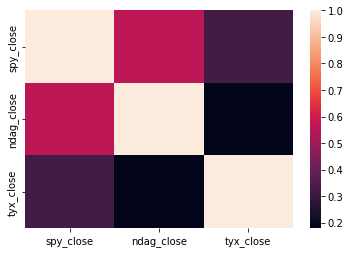

In [53]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

<AxesSubplot:>

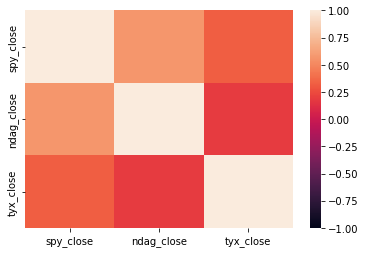

In [54]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

<AxesSubplot:xlabel='Date'>

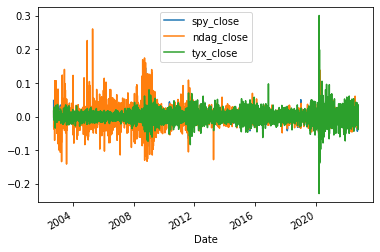

In [57]:
daily_returns.plot(kind="line")

In [58]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = data_df,
    weights = [.33,.33,.33],
    num_simulation = 500,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

SPY                                   \
                                Open       High        Low      Close   
Date                                                                    
2002-09-30 00:00:00-04:00  82.000000  82.800003  80.900002  81.790001   
2002-10-01 00:00:00-04:00  82.430000  85.769997  81.470001  85.720001   
2002-10-02 00:00:00-04:00  84.690002  85.529999  82.599998  83.150002   
2002-10-03 00:00:00-04:00  83.139999  84.599998  81.949997  82.309998   
2002-10-04 00:00:00-04:00  82.800003  82.919998  79.580002  80.800003   

                                                                 NDAQ  \
                           Adj Close    Volume daily_return      Open   
Date                                                                    
2002-09-30 00:00:00-04:00  55.707150  73096400          NaN  3.100000   
2002-10-01 00:00:00-04:00  58.383907  67198100     0.048050  3.166667   
2002-10-02 00:00:00-04:00  56.633461  56749100    -0.029981  3.166667   
2002-10-03 00:00:00-04:00  56.061367  55547000    -0.010102  3.183333   
2002-10-04 00:00:00-04:00  55.032890  68483700    -0.018345  3.183333   

                                               ...                   \
                               High       Low  ... Adj Close Volume   
Date                                           ...                    
2002-09-30 00:00:00-04:00  3.116667  3.100000  ...  2.621037   9300   
2002-10-01 00:00:00-04:00  3.166667  3.166667  ...  2.663086   6000   
2002-10-02 00:00:00-04:00  3.166667  3.100000  ...  2.654675  26100   
2002-10-03 00:00:00-04:00  3.183333  3.183333  ...  2.677102    300   
2002-10-04 00:00:00-04:00  3.183333  3.183333  ...  2.677102   1500   

                                         ^TYX                                 \
                          daily_return   Open   High    Low  Close Adj Close   
Date                                                                           
2002-09-30 00:00:00-04:00          NaN  4.666  4.668  4.618  4.662     4.662   
2002-10-01 00:00:00-04:00     0.016043  4.706  4.765  4.706  4.740     4.740   
2002-10-02 00:00:00-04:00    -0.003158  4.733  4.761  4.707  4.726     4.726   
2002-10-03 00:00:00-04:00     0.008447  4.715  4.760  4.707  4.742     4.742   
2002-10-04 00:00:00-04:00     0.000000  4.729  4.816  4.699  4.734     4.734   

                                               
                          Volume daily_return  
Date                                           
2002-09-30 00:00:00-04:00    0.0          NaN  
2002-10-01 00:00:00-04:00    0.0     0.016731  
2002-10-02 00:00:00-04:00    0.0    -0.002954  
2002-10-03 00:00:00-04:00    0.0     0.003386  
2002-10-04 00:00:00-04:00    0.0    -0.001687  

[5 rows x 21 columns]

In [59]:
 # Run a Monte Carlo simulation to forecast five years cumulative returns
current_forecasted_returns_df = MC_even_dist.calc_cumulative_return()



Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

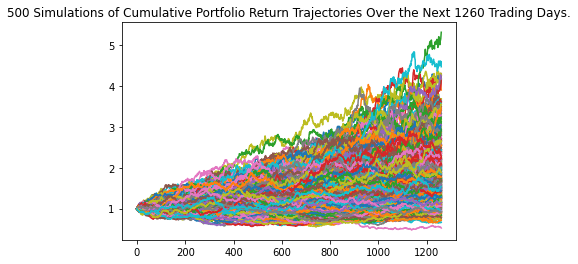

In [62]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

<AxesSubplot:>

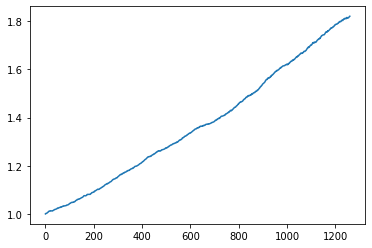

In [63]:
#Calculate the 'mean' of each simulation
current_forecasted_returns_df.mean(axis=1).plot()

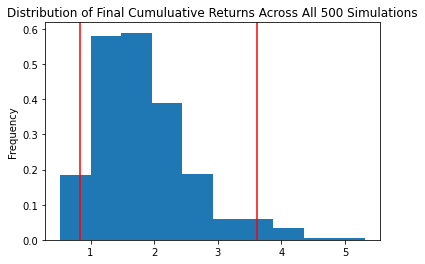

In [68]:
# Plot probability distribution and confidence intervals
portfolio_dist_plot = MC_even_dist.plot_distribution()

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
print(even_tbl)

count           500.000000
mean              1.821229
std               0.736327
min               0.525678
25%               1.276971
50%               1.674230
75%               2.195366
max               5.307054
95% CI Lower      0.837327
95% CI Upper      3.618452
Name: 1260, dtype: float64


In [70]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*100000,2)
even_ci_upper = round(even_tbl[9]*100000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 5 years will end within in the range of $83732.71 and $361845.21.


In [71]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% S&P500 stock
MC_spy = MCSimulation(
    portfolio_data = data_df,
    weights = [.60,.40,.0],
    num_simulation = 500,
    num_trading_days = 252*5)

# Print the simulation input data
MC_spy.portfolio_data.head()

SPY                                   \
                                Open       High        Low      Close   
Date                                                                    
2002-09-30 00:00:00-04:00  82.000000  82.800003  80.900002  81.790001   
2002-10-01 00:00:00-04:00  82.430000  85.769997  81.470001  85.720001   
2002-10-02 00:00:00-04:00  84.690002  85.529999  82.599998  83.150002   
2002-10-03 00:00:00-04:00  83.139999  84.599998  81.949997  82.309998   
2002-10-04 00:00:00-04:00  82.800003  82.919998  79.580002  80.800003   

                                                                 NDAQ  \
                           Adj Close    Volume daily_return      Open   
Date                                                                    
2002-09-30 00:00:00-04:00  55.707150  73096400          NaN  3.100000   
2002-10-01 00:00:00-04:00  58.383907  67198100     0.048050  3.166667   
2002-10-02 00:00:00-04:00  56.633461  56749100    -0.029981  3.166667   
2002-10-03 00:00:00-04:00  56.061367  55547000    -0.010102  3.183333   
2002-10-04 00:00:00-04:00  55.032890  68483700    -0.018345  3.183333   

                                               ...                   \
                               High       Low  ... Adj Close Volume   
Date                                           ...                    
2002-09-30 00:00:00-04:00  3.116667  3.100000  ...  2.621037   9300   
2002-10-01 00:00:00-04:00  3.166667  3.166667  ...  2.663086   6000   
2002-10-02 00:00:00-04:00  3.166667  3.100000  ...  2.654675  26100   
2002-10-03 00:00:00-04:00  3.183333  3.183333  ...  2.677102    300   
2002-10-04 00:00:00-04:00  3.183333  3.183333  ...  2.677102   1500   

                                         ^TYX                                 \
                          daily_return   Open   High    Low  Close Adj Close   
Date                                                                           
2002-09-30 00:00:00-04:00          NaN  4.666  4.668  4.618  4.662     4.662   
2002-10-01 00:00:00-04:00     0.016043  4.706  4.765  4.706  4.740     4.740   
2002-10-02 00:00:00-04:00    -0.003158  4.733  4.761  4.707  4.726     4.726   
2002-10-03 00:00:00-04:00     0.008447  4.715  4.760  4.707  4.742     4.742   
2002-10-04 00:00:00-04:00     0.000000  4.729  4.816  4.699  4.734     4.734   

                                               
                          Volume daily_return  
Date                                           
2002-09-30 00:00:00-04:00    0.0          NaN  
2002-10-01 00:00:00-04:00    0.0     0.016731  
2002-10-02 00:00:00-04:00    0.0    -0.002954  
2002-10-03 00:00:00-04:00    0.0     0.003386  
2002-10-04 00:00:00-04:00    0.0    -0.001687  

[5 rows x 21 columns]

In [72]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% S&P500 stock
spy_weighted_returns_df = MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

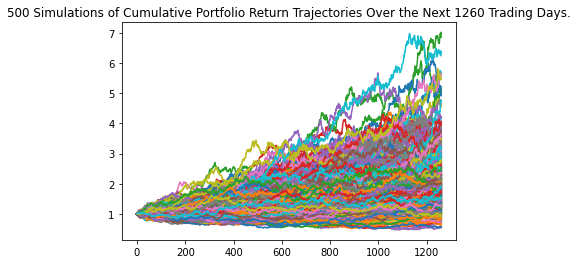

In [74]:
# Plot simulation outcomes
spy_line_plot = MC_spy.plot_simulation()

<AxesSubplot:>

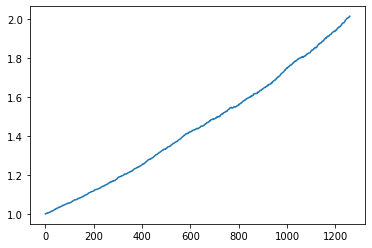

In [75]:
#Calculate the 'mean' of each simulation
spy_weighted_returns_df.mean(axis=1).plot()